# CONTENTS
- This a continuation of the previous series on Linear regression from scratch. 
- In this notebook only one method of the numerical approach will be implemented **" The batch Gradient Descent"**


# THE INTUITION
#####  Linear regression approach is divided into two categories:
- The Analytical approach*
- The Numerical Approach *

- The Analytical Approach also called the Closed form solution, uses the Normal equation(or Ordinary Least squared approach), with no update rule for the weights(theta). It models a linear relationship between the dependent and independent variables and calculates the error between expected and the actual using a set criterion(either of RMSE, MSE, MAE)

- The Numerical Approach uses Iterative methods updates weights until convergence or a global minimum is achieved, where the best or optimum weight value is achieved with cost error minimization. Here we focus on one type of the numerical approach "The Gradient Descent Algorithm and its Variant"

# Mathematical Concept: The Numerical Approach-Gradient Descent


- **Consider the following dataset $\mathcal{D} = \{X_i,y_i \}^{N}_{i=1}$, with $X_i\in \mathbb{R}^{d}, y_i\in \mathbb{R}$**

- Context: Supervised Learning
- Fit a line of the form: $y = X\theta $, $y \in \mathbb{R}^{N}$.
- Concept: Error Minimization of the difference between Predicted ($\hat{y}$) and Actual(y) i.e Mimimizing the square deviation(Mean Squared Error/ Cost Function/Error Metrics/Criteria

- $X_i$ : are the features.
- $y_i$ : is the response variable. 

### Prove/Derivation

- Remember our criteria from the ordinary least squared equation(The MSE)
$MSE = \frac{1}{N}\sum_{i=1}^n(h_\theta(x) - y)^2$

Where:

$h_\theta(x) = \hat{y}$

Now, to get the gradient(the first-order equation), we will differentiate the MSE with respect to $\theta$. We'll take the partial derivation of the equation, such that;
$\frac{\partial J(\theta)}{\partial \theta} = \frac{\partial}{\partial \theta}\frac{1}{2}(h_\theta(x) - y)^2$
- $\frac{1}{2} . 2(h_\theta(x) - y) . \frac{\partial}{\partial \theta}(h_\theta(x) - y) $
- $(h_\theta(x) - y) .\frac{\partial}{\partial \theta} \sum_{i=0}^n(\theta_ix_i - y)$  
- and @ i=0, $\theta_o = 1$;
- so, this part of the equation; $\frac{\partial}{\partial \theta} \sum_{i=0}^n(\theta_ix_i - y)$ ; is reduced to;
$\frac{\partial}{\partial \theta} \sum_{i=0}^n(\theta_ix_i - y) = x_i$

- so the final derivative is;
$(h_\theta(x) - y) . x_i$

- Therefore,the update rule becomes;
$\theta_j = \theta_j - \alpha(h_\theta(x) - y) . x_j$ ; also written as; $\theta_j = \theta_j + \alpha(y - h_\theta(x)) . x_j$
- This rule is known S the **"Widrow-hoff"** Learning rule

# Code Implementation of the Batch Gradient Descent- Numerical Approach

In [1]:
#Import the required Library
import pandas as pd # For reading the data and data preprocessing
import numpy as np #For linear Algebra
import seaborn as sns # for visualization
import matplotlib.pyplot as plt #For visualization
#Ipython Magic command for Inline plot display
%matplotlib inline 
import warnings #To hide unnecessary warnings
warnings.filterwarnings('ignore')


### Read the Data

In [2]:
#Define a function to read the Data
def read_data(path,header,sep): #Define function
    
    df = pd.read_csv(path,header,sep) #read the data
    
    print(df.shape) #Get the shape of the data
    print(df.columns)
    
    return df #return df from the function
df = read_data('o-ring-erosion-only.data', header=None, sep='\s+')  #applying the function

(22, 5)
Index(['6', '0', '66', '50', '1'], dtype='object')


In [3]:
col = ['Number of O-rings at risk on a given flight',
       'Number experiencing thermal distress',
       'Launch temperature (degrees F)',
       'Leak-check pressure (psi)',
       'Temporal order of flight']
df.columns = col
df.head()

,Number of O-rings at risk on a given flight,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
0,6,1,70,50,2
1,6,0,69,50,3
2,6,0,68,50,4
3,6,0,67,50,5
4,6,0,72,50,6


In [4]:
df.shape

(22, 5)

In [5]:
df.describe()

,Number of O-rings at risk on a given flight,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
count,22.0,22.000000,22.000000,22.000000,22.000000
mean,6.0,0.318182,69.727273,156.818182,12.500000
std,0.0,0.567900,7.179215,66.000459,6.493587
min,6.0,0.000000,53.000000,50.000000,2.000000
25%,6.0,0.000000,67.000000,100.000000,7.250000
50%,6.0,0.000000,70.000000,200.000000,12.500000
75%,6.0,0.750000,75.000000,200.000000,17.750000
max,6.0,2.000000,81.000000,200.000000,23.000000


In [6]:
df['Number of O-rings at risk on a given flight'].unique()

array([6])

### Split the data into X and Y

In [7]:
#Split the data into X and Y
def splitxy(df):
    """ Defining a split function to get X(features) and Y(target) variables"""
    
    X = df.drop(['Number of O-rings at risk on a given flight','Number experiencing thermal distress'], axis = 1)
    Y = df['Number experiencing thermal distress']
    
    return X,Y 

In [8]:
X,Y = splitxy(df)
X

,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
0,70,50,2
1,69,50,3
2,68,50,4
3,67,50,5
4,72,50,6
5,73,100,7
6,70,100,8
7,57,200,9
8,63,200,10
9,70,200,11


### Standardize X and Add a Bias

In [9]:
def preprocess(X,Y):
    
    """ Defining the preprocess function. 
        Calling X and Y variable from the preprocess function defined earlier"""
    X, Y = splitxy(df) 
    #X = (X - X.min())/(X.max() - X.min()) #Min-Max/Standardization
    X =(X - X.mean())/X.std() #Normalization 
    Y = Y.values.reshape(-1,1)
    return X,Y

def bias(X):
    b = np.ones((len(X),1)) 
    
    """Remember the double parenthesis when using np.ones
    Also remember that when '1' is added, 
    it states that the array wil be built column-wise
    So stacking with X has to be in the same representation"""
    
    X,_ = preprocess(X,Y)
    
    X = np.concatenate([X,b], axis=1) #Concatenate X and bias, column wise
    
    
    return X    

### Spiltting into Train and Test Set (Train_Test_Split from Scratch)

In [10]:
def train_test_split(X,Y,split_size=0.2): 
    
    """ Defining split function, presetting the split ratio to 20%,
        although it can be changed when calling the function by passing the desired value
        using the name of the argument"""
    _,Y = preprocess(X,Y) #Get Y, from the preprocess function
    X = bias(X) #Get X from the bias function
    
    #X = X.sample(frac=1, random_state=anything)==another way of shuffling data
    #Shuffling Data
    np.random.shuffle(X) #using numpy here but pandas can be used on the dataframe(df) directly before splitting
    np.random.shuffle(Y)
    
    n = X.shape[0] #number of data points/rowa
    test_size = n - int(n * split_size) #multiply by split size
    """we have to cast an int here because by default Python returns a float value,
    Which is not what we seek"""
    X_train,X_test = X[:test_size], X[test_size:]
    Y_train,Y_test = Y[:test_size], Y[test_size:]
    
    
    print("X_train Shape is: ", X_train.shape)
    print("X_test Shape is: ", X_test.shape)
    print("Y_train Shape is: ", Y_train.shape)
    print("Y_test Shape is: ", Y_test.shape)
    
    
    return X_train,X_test,Y_train,Y_test
    


In [11]:
#Get train and test set and store in a variable
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

X_train Shape is:  (18, 4)
X_test Shape is:  (4, 4)
Y_train Shape is:  (18, 1)
Y_test Shape is:  (4, 1)


$(X.T)^-1.X.y$

## MODELLING : Simple Linear Regression

In [18]:
#Define the model Class
class GradientDescent:
    def __init__(self,lr,epoch):
        self.theta = None
        self.lr = lr
        self.epoch = epoch

    def fit(self,X_train,y_train,eps=0.0000001):
        """ Train/Fit Function
        Calculate theta iteratively using the update rule. 
        eps= Precision. We set the precision to define a point of convergence"""
        d =X_train.shape[1]
        
        cost = [] #initiate cost as a list to be used for storing and plotting the loss at each iteration
        self.theta = np.random.rand(d,1) #initiate theta as a random set of numbers with same shape as X features
        m = 1/(len(y_train))
        #print(self.theta.shape)
        for i in range(self.epoch): #define a for loop for the iterative process
            prev_theta = self.theta #storing the initial value of theta for to compare with precision of thresh if set
        #define the derviative of the loss function(the gradient)
            grad = X_train.T@(X_train@self.theta - y_train)
        #Also represented as: grad = (X_train@theta - y_train)@X_train
        #define the update rule
            self.theta = self.theta - self.lr * (1/m) * grad
            loss = (1/m) * np.sum(((X_train@self.theta)-y_train)**2)
            diff = np.sum(prev_theta - self.theta) #Setting a precision
            if diff <= eps:
                break
            cost.append(loss)
            plt.plot(cost) #Plot loss during training
            
           
        
        
        return self.theta
    

        
    def predict(self,X_test):
        """ Predict Function on Test set"""
        self.y_pred = np.dot(X_test, self.theta)
        
        return self.y_pred
    
    def compute_mse(self):
        """ Error Function"""
        
        mse = (np.subtract(self.y_pred, Y_test)**2).mean()
        
        print('Mse is: ')
        
        return mse
        
        
        
        

array([[ 0.1431272 ],
       [ 0.46177471],
       [-0.49535374],
       [ 0.24866246]])

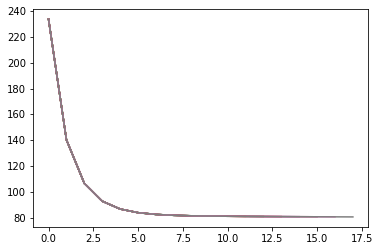

In [19]:
model = GradientDescent(lr=0.001,epoch=500)
model.fit(X_train,Y_train)


In [14]:
model.predict(X_test)

array([[-0.73443049],
       [-0.15499815],
       [ 0.34654997],
       [ 0.77127229]])

In [15]:
model.compute_mse()

Mse is: 


0.7238166896571427